In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import gensim

from const import target_genes
from models import Gene2Vec
from source import read_preprocessed_data
from transform import load_process_and_store_spreadsheets

RANDOM_SEED = 1234
np.random.seed(RANDOM_SEED)

In [2]:
model = gensim.models.KeyedVectors.load_word2vec_format('gene2vec_dim_200_iter_9_w2v.txt', binary=False)

In [3]:
# Not all target genes are available in the vocabulary of the word embedding.
available_target_genes = [gene for gene in target_genes if gene in model.vocab.keys()]

In [4]:
# Make a random selection of genes, to compare to the target genes.
vocabulary = tuple(model.vocab.keys())

random_indices = np.random.randint(0, len(vocabulary), size=len(available_target_genes))
# Embed genes.
rand_genes_emb = np.array([model[vocabulary[i]] for i in random_indices])

In [5]:
# Embed the target genes.
target_genes_emb = np.array([model[gene] for gene in available_target_genes])

In [6]:
X = np.concatenate([target_genes_emb, rand_genes_emb], axis=0)
y_is_target = np.zeros(X.shape[0])
y_is_target[0:target_genes_emb.shape[0]] = 1

In [7]:
# Project embedded genes to 2D.
X_2d = TSNE(n_components=2, random_state=RANDOM_SEED).fit_transform(X)

# Avenio kit target genes v.s. random genes

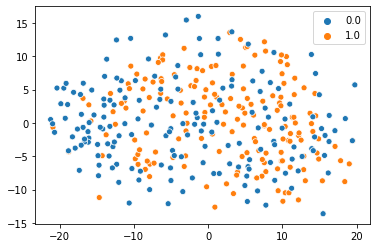

In [8]:
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y_is_target)

## Convert 

In [9]:
allele_columns = ["T0: Allele \nFraction", "T1: Allele Fraction"]
load_process_and_store_spreadsheets(allele_columns=allele_columns, transformation=lambda x, y: y*x/(x+y))

X_train, y_train = read_preprocessed_data("output/train.tsv")
X_test, y_test = read_preprocessed_data("output/test.tsv")

In [11]:
embedder = Gene2Vec(remainder='ignore')
X_train_emb = embedder.fit_transform(X_train)
X_test_emb = embedder.transform(X_test)

In [12]:
X_2d = TSNE(n_components=2, random_state=RANDOM_SEED).fit_transform(X_train_emb.iloc[:,-200:])
# X_2d = PCA(n_components=2, random_state=RANDOM_SEED).fit_transform(X_train_emb.iloc[:,-200:])

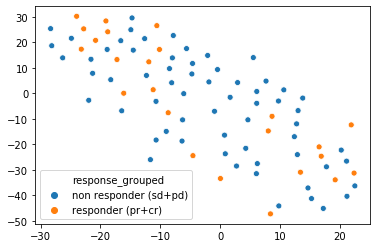

In [13]:
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y_train['response_grouped'])
# plt.xlim([-0.1, 0.2])
# plt.ylim([-0.05, 0.05])

In [14]:
X_2d_orig = TSNE(n_components=2, random_state=RANDOM_SEED).fit_transform(X_train.iloc[:, :-13])
# X_2d_orig = PCA(n_components=2, random_state=RANDOM_SEED).fit_transform(X_train.iloc[:, :-13])

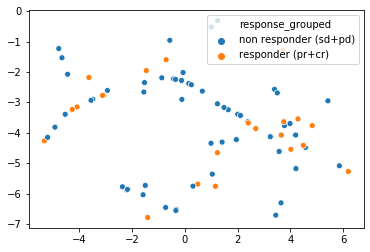

In [15]:
sns.scatterplot(x=X_2d_orig[:, 0], y=X_2d_orig[:, 1], hue=y_train['response_grouped'])
# plt.xlim([-0.05, 0.05])
# plt.ylim([-.01, 0.01])